In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cairosvg

In [2]:
withdrawal_data = pd.read_excel('/data/annika/POT1_Screen_VUS_Combined/FigureGeneration/OtherFigs/ATRinhibition.xlsx')

In [8]:
[x for x in withdrawal_data.columns if 'Sample' not in x][0].split('_')[0]

'+ATRi'

In [32]:
transformed_data = pd.DataFrame()
cols = [x for x in withdrawal_data.columns if 'Sample' not in x]
for index, row in withdrawal_data.iterrows():
    sample = row['Sample']
    for col in cols:
        newcol = col.split('_')[0]
        tdf = pd.DataFrame(columns=['Sample','Value','Condition'])
        tdf.loc[0,'Sample'] = sample
        tdf.loc[0,'Value'] = float(row[col])
        tdf.loc[0,'Condition'] = newcol
        transformed_data = pd.concat([transformed_data,tdf])


In [56]:
ordering_dict = {'FS':10,'SYN':0}
transformed_data['order'] = transformed_data.Sample.apply(lambda x: ordering_dict[x[:-1]] + int(x[-1]))
transformed_data = transformed_data.sort_values(by=['order','Condition']).reset_index(drop=True)
transformed_data 

,Sample,Value,Condition,order
0,SYN1,1.044,+ATRi,1
1,SYN1,1.081,+ATRi,1
2,SYN1,0.875,+ATRi,1
3,SYN1,0.987,-ATRi,1
4,SYN1,0.942,-ATRi,1
5,SYN1,1.035,-ATRi,1
6,SYN2,0.996,+ATRi,2
7,SYN2,1.001,+ATRi,2
8,SYN2,1.003,+ATRi,2
9,SYN2,0.94,-ATRi,2


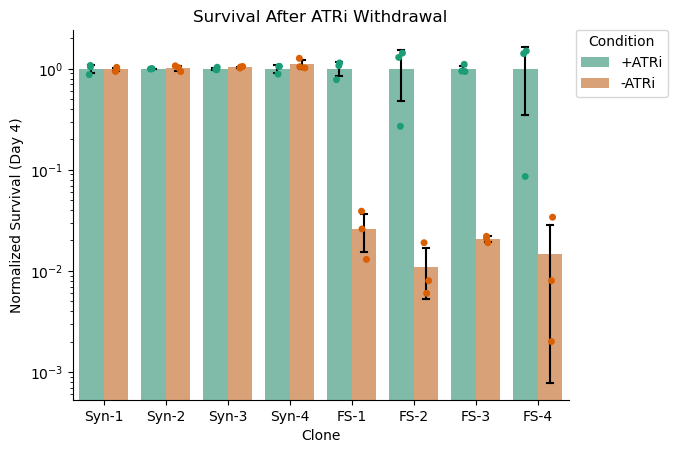

In [84]:
savepath = '/data/annika/POT1_Screen_VUS_Combined/FigureGeneration/OtherFigs'
fig, ax = plt.subplots()
ax = sns.barplot(
    x="Sample", 
    y="Value", 
    hue="Condition", 
    data=transformed_data, 
    errcolor="black",
    ci='sd',
    errwidth=1.5,
    capsize = 0.1,
    alpha=0.6,
    palette='Dark2'
)

sns.stripplot(
    x="Sample", 
    y="Value", 
    hue="Condition", 
    palette='Dark2',
    edgecolor='black',
    data=transformed_data, dodge=True, ax=ax
)
ax.set(ylabel='Normalized Survival (Day 4)',xlabel='Clone',
       xticklabels=['Syn-1','Syn-2','Syn-3','Syn-4','FS-1','FS-2','FS-3','FS-4'],
       title='Survival After ATRi Withdrawal')
sns.despine(ax=ax,top=True,right=True)
plt.yscale('log')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], title='Condition', bbox_to_anchor=(1, 1.02), loc='upper left')

plt.show()
plt.close()
fig.savefig(os.path.join(savepath,'ATRiWithrawal.png'),bbox_inches='tight')
fig.savefig(os.path.join(savepath,'ATRiWithrawal_Transparent.png'),bbox_inches='tight',transparent=True)
svg_path = os.path.join(savepath,'ATRiWithrawal.svg')
ai_path = os.path.join(savepath,'ATRiWithrawal.ai')
plt.rcParams['svg.fonttype'] = 'none'
# Save the heatmap as an SVG file
fig.savefig(svg_path, format="svg")
# Convert the SVG file to AI format
cairosvg.svg2pdf(url=svg_path, write_to=ai_path)